# *CPU-Scheduling*

---

## **1. CPU-Scheduling이란?**
- 운영체제의 CPU 스케줄러는 Ready 상태의 프로세스 중에서 어떤 프로세스에게 CPU를 할당할지 결정하는 것이다.
- 따라서, CPU 스케줄링이란 운영체제가 프로세스에 합리적으로 CPU 자원을 할당하게 만드는 방법이다.

- ex) 만약, CPU가 1개이고, multiprogrammed가 된 상태라면?
    - CPU의 자원을 분할해서 process들을 효율적으로(or CPU 자원을 효율적으로) 처리하는 방법이 필요하다.

#### - Histogram of CPU-burst duration
- 일반적인 상황에서 CPU burst(Process Running)가 많은 경우, I/O burst(Waiting)가 많은 경우 어떤 경우가 더 많을까?

    - 다양한 경우들이 많지만 일반적으로는 I/O burst(Waiting)인 경우가 더 많다!

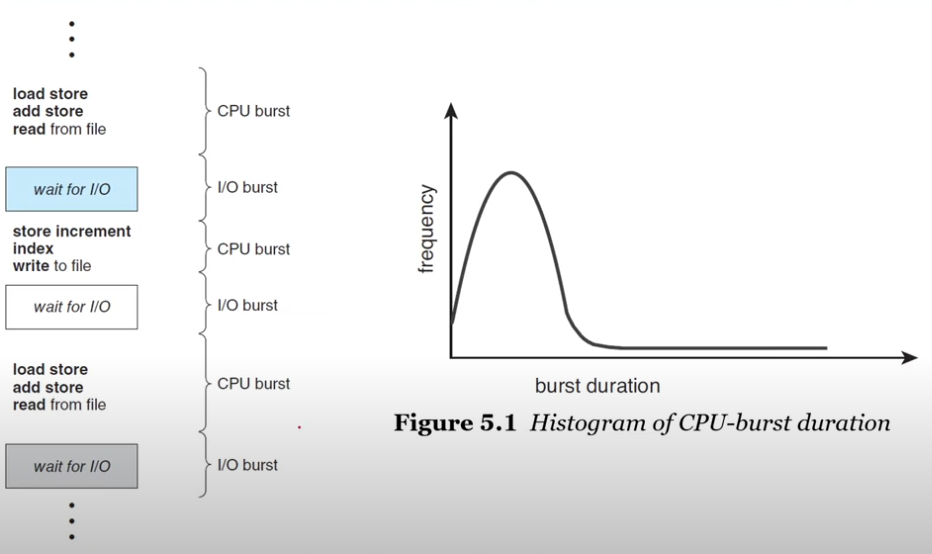

- 위와 같은 상황에서 CPU Scheduling을 동작하고 이 방법을 통해서 Time Sharing을 하면 CPU의 효율 더 좋아진다.

- [참고] I/O process 를 진행하면서 기다리는 시간을 I/O burst (time) 이라고 하고,   
   CPU process 를 진행하면서 기다리는 시간을 CPU busrt (time) 이라고 한다.

<br>
<br>

---

## **2. CPU Scheduling 고려사항**

#### 1. CPU Scheduler를 만들 때 고려해야할 상황은 어떤 것일까?
- wait 하고 있는 상태의 process들은 고려하지 않아도 됨
- 따라서, ready 상태에 있는 process 들 중에서 CPU를 할당해 줄 수 있는 Process를 선택하는 것이 고려해야 할 상황

#### 2. 그렇다면 프로세스를 선택하기 위해서는 어떤 기준으로 선택해야 하는 것 일까?
- Linked List or Binary Tree
- FIFO Queue : First-In, First-Out
- Priority Queue (어떤 방법으로 우선순위를 결정할 것인가..)   
   
- 위와 같은 상황을 고려하기 위해서는 CPU Scheduling 방법의 주요 인자들에 대해서 이해해야 함

<br>
<br>

---


## **3. CPU Scheduling을 알기 전 알아야 할 Basic 내용**

#### 1. Preemptive VS Non-Preemptive

- Non-Preemptive (비선점형)
    - 어떤 Proces가 CPU를 선점하면 그 프로세스가 끝나기 전까지(자발적으로 나오기 전까지는) 기다리는 방법

- Preemptive (선점형)
    - 어떤 Process가 CPU를 선점해도 어떠한 사유에 의해서 기존에 선점한 Process의 우선순위를 미루고 다른 Process를 할당하는 방법


- CPU Scheduling은 어떤 상황들이 있고, 어떤 방법을 선택해야할까?

    1. Process가 Running 상태에서 Wating 상태로 가는 경우

    2. Process가 Running 상태에서 Ready 상태로 가는 경우

    3. Process가 Wating 상태에서 Ready 상태로 가는 경우

    4. Process가 종료(Terminate)되는 경우

    - 1번과 4번의 경우에서는 자발적으로 변하는 상황으로 Non-Preemptive 하다.
    - 2번과 3번의 경우에는 비자발적으로 변하는 상황으로 Preemptive 하다.
    - 경우에 따라서 어떤 Schedling 방식을 선택할지 고민해야 한다.

<br> 

#### 2. Dispatcher

- CPU의 control을 넘겨주는 모듈을 의미한다.
    - CPU의 Running 상태를 ready 또는 wait 상태로 바꾸고 Context switch를 통해 CPU를 넘겨주는 모듈

- Dispatcher의 기능

    1. context를 다른 Process로 넘겨준다.

    2. user mode로 바꿔준다.

    3. 새로운 Process를 적당한 위치로 넘겨준다.


[참고] CPU를 선점할 Process를 고르는 것은 CPU Scheduler가 하지만 context를 바꿔주는 것은 dispatch가 한다!    
큰 의미에서 보면 CPU Scheduling 안에 포함되어있는 개념

- Dispatcher의 동작은 가능한 빨라야 한다.

    - P0와 P1 의 Process가 context-switch 동작한다고 할 때, 아래와 같은 Sequence로 dispatch가 작동함

    1. P0의 Context(=PCB0)를 저장한다.

    2. P1의 Context(=PCB1)를 복구하여 context-switch를 한다.

        - 위와 같이 작동하는 시간을 **Dispatch latency** 라 한다.   

    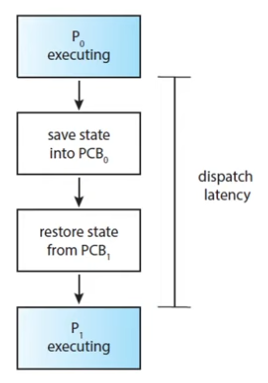

- [참고]context switch는 얼마나 자주 일어날까..?

    - Linux 명령어 : vmstat 1 3 => 1초에 3번 출력

    - cs (context switch) : 초당 발생한 context switch의 수   

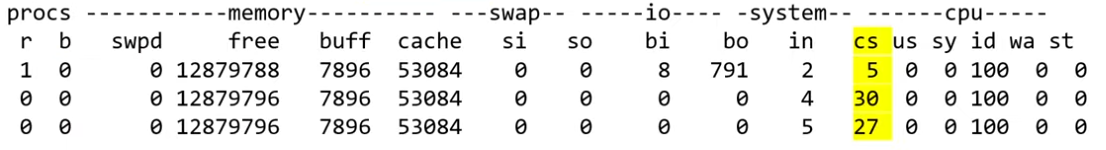

<br> 

#### 3. Scheduling Criteria

1. CPU utilization : CPU를 가장 많이 사용할 수 있도록 유지

2. Throughput : 단위 시간 당 CPU가 process를 완료시키는 수

3. **Turnaround time : 어떤 Process의 시작부터 종료까지의 시간을 최소화하는 시간**

4. **Waiting time : 어떤 Process가 ready queue에서 대기하는 시간의 양, ready queue에서의 대기시간의 합**
    - Wating time을 최소화하면 1번, 2번, 3번 항목의 값이 높아진다.

5. Response time : Process가 반응하는 시간

<br>
<br>

---

## **4. Scheduling Algorithms**


#### 1. Solutions for Scheduling Problem

1. FCFS : First-Come, First-Served    
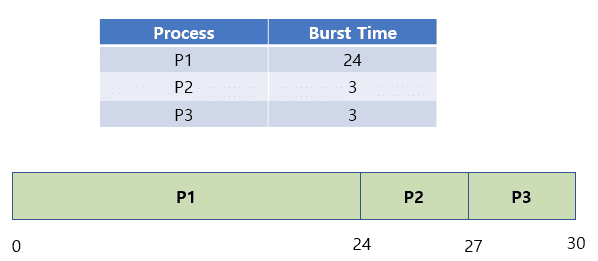   

- 비선점형 스케줄링

    - 가장 먼저 요청한 프로세스에 CPU를 할당해주는 선착순 방식

    - Convoy Effect(호위 효과)가 발생 가능

    - Convoy Effect : 몇 개의 시간이 오래 걸리는 프로세스로 인해 전체 OS가 느려지는 현상


    1. 대기시간(Wating Time) : P1 = 0, P2 = 24, P3 = 27
    2. 반환시간(Turaround Time) : P1 = 24, P2 = 27, P3= 30
    3. 반응시간(Response Time) : P1 = 0, P2 = 24, P3 = 27
    4. 평균 대기 시간 (0 + 24 + 27) / 3 = 17

<br>

2. SJF : Shortest Job First (SRTF : Shortest Remaining Time First)   
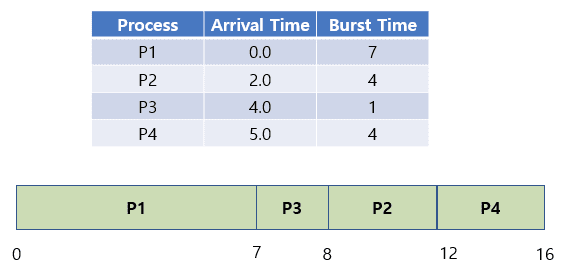   

- 비선점형 스케줄링

    - 실행 시간이 가장 짧은 프로세스를 먼저 실행하는 알고리즘

    - 실제로는 프로세스의 CPU 실행 시간을 예측하는 것이 어렵다는 문제가 있음

    - 긴 시간이 필요한 프로세스의 우선순위가 계속 밀려 실행되지 못한 기아 현상(Starvation)이 발생할 수 있음


    1. 대기시간(Wating Time) : P1 = 6, P2 = 0, P3 = 16, P4 = 18, P5 = 1
    2. 반환시간(Turaround Time) : P1 = 16, P2 = 1, P3 = 18, P4 = 19, P5 = 6
    3. 반응시간(Response Time) : P1 = 6, P2 = 0, P3 = 16, P4 = 18, P5 = 1
    4. 평균 대기 시간 (6 + 0 + 16 + 18 + 1) / 5 = 8.2

<br>

3. RR : Round-Robin   
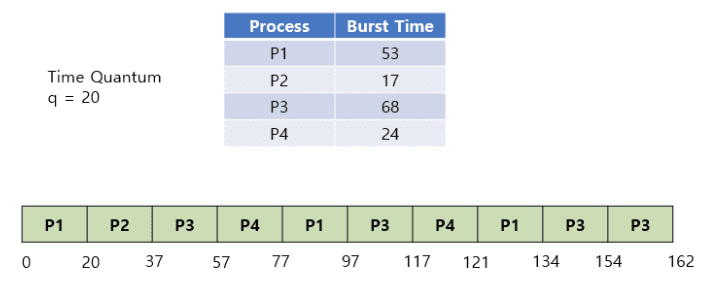   

- 선점형 스케줄링

    - 현대 컴퓨터가 사용하는 우선순위 스케줄링

    - 각각의 프로세스에 동일한 할당 시간을 부여해서 해당 시간 동안만 CPU를 이용

    - 할당 시간 내 완료하지 못하면 강제 중단 후 다음 작업으로 넘어감

    - 응답 시간을 빠르게 할 수 있지만 할당 시간이 길면 FCFS처럼 작동

    - 반대로 할당 시간이 너무 짧으면 Process Sharing이라고 부른다.
        - 이것은 N개의 프로세스가 프로세서에 속도의 1/N 씩 작동함을 의미

    1. 대기시간(Wating Time) : P1 = 81, P2 = 20, P3 = 94, P4 = 97
    2. 반환시간(Turaround Time) : P1 = 77, P2 = 37, P3 = 162, P4 = 121
    3. 반응시간(Response Time) : P1 = 0, P2 = 20, P3 = 37, P4 = 57
    4. 평균 대기 시간 (81 + 20 + 94 + 97) / 4 = 73

<br>

4. SRF   
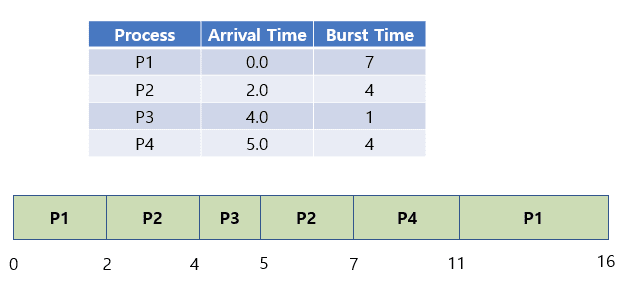   

- 선점형 스케줄링

    - 현재 실행되고 있는 프로세스의 남은 시간보다 더 빨리 끝날 수 있는 짧은 프로세스가 들어오면   
    현재 프로세스를 중단하고 짧은 프로세스를 실행하도록 바꾼다.
    
    - SRTF(Shortest Remaining Time First)라고도 부른다.

    - 이 방법은 평균 대기 시간을 줄일 수 있지만 다음 프로세스의 CPU burst time을 예측하기 어렵다.

    1. 대기시간(Wating Time) : P1 = 9, P2 = 1, P3 = 94, 0 = 2
    2. 반환시간(Turaround Time) : P1 = 16, P2 = 5, P3 = 1, P4 = 6
    3. 반응시간(Response Time) : P1 = 0, P2 = 0, P3 = 0, P4 = 2
    4. 평균 대기 시간 (9 + 1 + 0 + 2) / 4 = 3

<br>

5. MLQ : Multi-Level Queue   
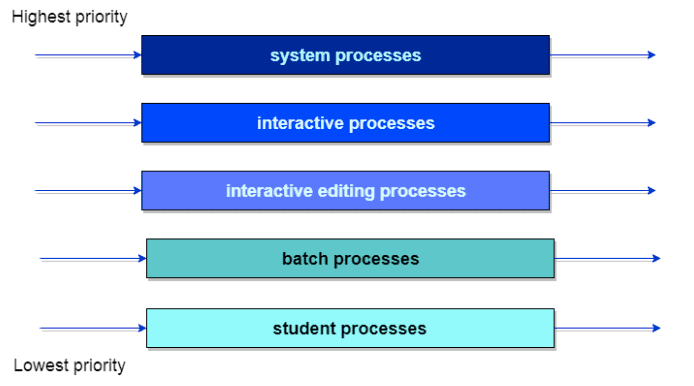   

- 선점형 스케줄링

    - 우선순위에 따른 준비 큐가 여러 개의 큐들로 나뉘고 각각의 큐는 각자의 스케줄링 알고리즘을 가지고 있음
    - 우선순위가 높은 큐부터 처리되기 때문에 낮은 큐의 프로세스가 처리 안되는 기아 현상(Starvation)현상이 나타날 수 있음
    - 각 큐 사이에서 프로세스들이 이동할 수 없어서 유연성이 떨어진다.
